In [1]:
import numpy as np
import scipy.stats
import pickle
import util
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
seed=229
state = np.random.RandomState(seed)

trainfile = 'data/train.csv'
header, ids, X, Y = util.fetch_data(trainfile, impute=True)

Neural nets need to work with standardized data:

In [3]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=state)

A function to determine the number of neurons in a hidden layer:

In [ ]:
# Based on https://stats.stackexchange.com/a/136542
def num_hidden(a):
    return int(m/(a * (n_inputs + n_outputs)))

m = X.shape[0]
n_inputs = X.shape[1]
n_outputs = 1

avals = range(2,10)

# One hidden layer: Training
Skip to `Evaluation` to produce plots and an output.

In [ ]:
params = {'solver': ['adam'],
        'hidden_layer_sizes': [(n,) for n in np.arange(100,300,20)],
        'activation': ['logistic'], 
        'alpha': np.logspace(-7, -2, 10),
        'early_stopping': [True, False], 
        #'warm_start': True,
       }

mlp_onelayer = MLPClassifier(verbose=False)
cv_onelayer = GridSearchCV(mlp_onelayer, param_grid=params, scoring=util.gini_proba_scorer, n_jobs=-1,
                          verbose=2)
cv_onelayer.fit(X, Y)

In [ ]:
mlp_onelayer_out = open('models/multilayer_perceptron_onelayer.pickle', 'wb')
pickle.dump(cv_onelayer.best_estimator_, mlp_onelayer_out)
mlp_onelayer_out.close()

# One hidden layer: Evaluation

In [4]:
mlp_onelayer = pickle.load(open('models/multilayer_perceptron_onelayer.pickle'))
print(mlp_onelayer)

MLPClassifier(activation='logistic', alpha=0.00077426368268112774,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(220,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


/Users/Matthew/anaconda2/lib/python2.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.18.1 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/Matthew/anaconda2/lib/python2.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.18.1 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [5]:
trainsizes, traingini, testgini = util.learning_curves(mlp_onelayer, X_train, X_test, y_train, y_test,
                                                      scorer=util.gini_proba_scorer)
print(traingini)
print('')
print(testgini)

Evaluating model on training set size 23808
Evaluating model on training set size 47616
Evaluating model on training set size 71425
Evaluating model on training set size 95233
Evaluating model on training set size 119042
Evaluating model on training set size 142850
Evaluating model on training set size 166659
Evaluating model on training set size 190467
Evaluating model on training set size 214276
Evaluating model on training set size 238084
Evaluating model on training set size 261892
Evaluating model on training set size 285701
Evaluating model on training set size 309509
Evaluating model on training set size 333318
Evaluating model on training set size 357126
Evaluating model on training set size 380935
Evaluating model on training set size 404743
Evaluating model on training set size 428552
Evaluating model on training set size 452360
Evaluating model on training set size 476169
[0.22809618090484143, 0.24590280518970292, 0.23286643528248427, 0.23108552718362113, 0.23931837896766323

In [6]:
plt.figure()
plt.plot(trainsizes, traingini, label='train gini')
plt.plot(trainsizes, testgini, label='test gini')
plt.xlabel('Training set size')
plt.ylabel('Normalized Gini coefficient')
plt.title('Multi-layer perceptron, one hidden layer')
plt.legend()
plt.savefig('figures/learning_curves/mlp_onelayer.eps', format='eps', dpi=1000)

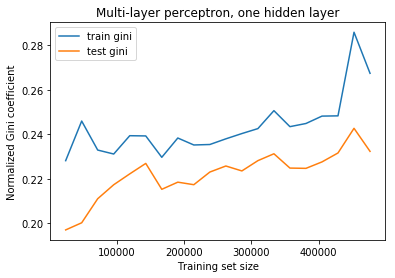

In [7]:
plt.show()

# One hidden layer: Output

In [ ]:
mlp_onelayer.fit(X, Y)
print(util.gini_proba_scorer(mlp_onelayer, X, Y))

In [ ]:
testfile = 'data/test.csv'
util.make_prediction(mlp_onelayer, testfile, 'predictions/mlp_onelayer.csv', scaler=scaler,
                     predict_method=util.proba_method(mlp_onelayer))

# Two hidden layers: Training

In [ ]:
params = {'solver': ['adam'],
        'hidden_layer_sizes': [(n, int(np.sqrt(n))) for n in np.arange(100,320,20)],
        'activation': ['relu', 'logistic'], 
        'alpha': np.logspace(-7, -2, 10),
        'early_stopping': [True, False], 
        #'warm_start': True,
       }

mlp_twolayer = MLPClassifier(verbose=False)
cv_twolayer = GridSearchCV(mlp_twolayer, param_grid=params, scoring=util.gini_proba_scorer, n_jobs=-1,
                          verbose=2)
cv_twolayer.fit(X, Y)

In [ ]:
mlp_twolayer_out = open('models/multilayer_perceptron_twolayer.pickle', 'wb')
pickle.dump(cv_twolayer.best_estimator_, mlp_twolayer_out)
mlp_twolayer_out.close()

# Two hidden layers: Evaluation

In [8]:
mlp_twolayer = pickle.load(open('models/multilayer_perceptron_twolayer.pickle'))
print(mlp_twolayer)

MLPClassifier(activation='logistic', alpha=1.2915496650148827e-06,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(100, 10),
       learning_rate='constant', learning_rate_init=0.001, max_iter=200,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [9]:
trainsizes, traingini, testgini = util.learning_curves(mlp_twolayer, X_train, X_test, y_train, y_test,
                                                      scorer=util.gini_proba_scorer)
print(traingini)
print('')
print(testgini)

Evaluating model on training set size 23808
Evaluating model on training set size 47616


/Users/Matthew/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Evaluating model on training set size 71425
Evaluating model on training set size 95233
Evaluating model on training set size 119042
Evaluating model on training set size 142850
Evaluating model on training set size 166659
Evaluating model on training set size 190467
Evaluating model on training set size 214276
Evaluating model on training set size 238084
Evaluating model on training set size 261892
Evaluating model on training set size 285701
Evaluating model on training set size 309509
Evaluating model on training set size 333318
Evaluating model on training set size 357126
Evaluating model on training set size 380935
Evaluating model on training set size 404743
Evaluating model on training set size 428552
Evaluating model on training set size 452360
Evaluating model on training set size 476169
[0.1991431510937873, 0.98915020561260314, 0.93387669662751005, 0.2500903232402179, 0.7976567983484053, 0.73769262901807897, 0.70783424177517418, 0.67027630286374607, 0.65565137012797181, 0.256

In [10]:
plt.figure()
plt.plot(trainsizes, traingini, label='train gini')
plt.plot(trainsizes, testgini, label='test gini')
plt.xlabel('Training set size')
plt.ylabel('Normalized Gini coefficient')
plt.title('Multi-layer perceptron, two hidden layers')
plt.legend()
plt.savefig('figures/learning_curves/mlp_twolayer.eps', format='eps', dpi=1000)

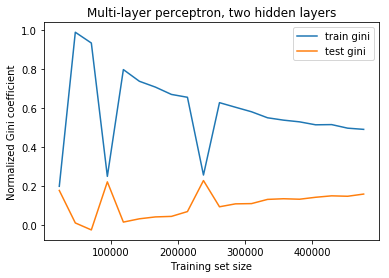

In [11]:
plt.show()

# Two hidden layers: Output

In [ ]:
mlp_twolayer.fit(X, Y)
print(util.gini_proba_scorer(mlp_twolayer, X, Y))

In [ ]:
testfile = 'data/test.csv'
util.make_prediction(mlp_twolayer, testfile, 'predictions/mlp_twolayer.csv', scaler=scaler,
                     predict_method=util.proba_method(mlp_twolayer))